<a href="https://colab.research.google.com/github/pfbrune/GrokkingML/blob/main/ch4_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
#domain for model, and basis polynomial
x_lower = -10
x_upper = 6
basis_coefs = [15,1,-1]

In [4]:
#define helper functions
def make_polynomial(coefs_in,x_vals):
  num_coefs = len(coefs_in)
  return sum([coefs_in[i]*x_vals**i for i in range(num_coefs)])

def draw_polynomial(coefs_in, x_lims):
  num_coefs = len(coefs_in)
  x_vec = np.linspace(x_lims[0],x_lims[1],1000)
  plt.plot(x_vec,make_polynomial(coefs_in,x_vec))

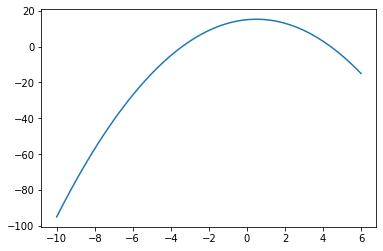

In [5]:
draw_polynomial(basis_coefs,[x_lower,x_upper])

In [6]:
#create data set to model by adding random bounce around the basis polynomial
num_points = 100
X = []
Y = []
for i in range(num_points):
  x = random.uniform(x_lower,x_upper)
  y = make_polynomial(basis_coefs,x) + random.gauss(0,14)
  X.append(x)
  Y.append(y)

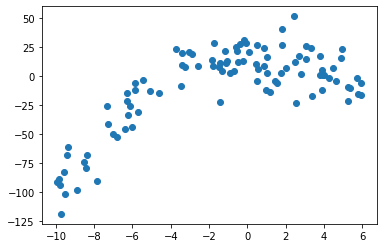

In [7]:
#plot data as scatter
plt.scatter(X,Y);

In [8]:
data = pd.DataFrame(data={'x':X,'y':Y})
data

,x,y
0,-9.527673,-102.298631
1,3.899168,5.304760
2,-0.058777,28.486499
3,-2.886022,19.072277
4,2.540331,-23.659561
...,...,...
95,-4.632601,-14.491622
96,3.828720,0.558060
97,2.702013,17.213085
98,0.894706,23.752523


In [61]:
#add rows to data frame for powers of x
for i in range(2,50):
  column_name = 'x^'+str(i)
  col_to_add = data['x'].apply(lambda x:x**i)
  pd.concat([data,col_to_add],axis=1)
data

,x,y,x^2,x^3,x^4,x^5,x^6,x^7,x^8,x^9,x^10,x^11,x^12,x^13,x^14,x^15,x^16,x^17,x^18,x^19,x^20,x^21,x^22,x^23,x^24,x^25,x^26,x^27,x^28,x^29,x^30,x^31,x^32,x^33,x^34,x^35,x^36,x^37,x^38,x^39,...,x^160,x^161,x^162,x^163,x^164,x^165,x^166,x^167,x^168,x^169,x^170,x^171,x^172,x^173,x^174,x^175,x^176,x^177,x^178,x^179,x^180,x^181,x^182,x^183,x^184,x^185,x^186,x^187,x^188,x^189,x^190,x^191,x^192,x^193,x^194,x^195,x^196,x^197,x^198,x^199
0,-9.527673,-102.298631,90.776555,-864.889339,8240.382890,-7.851167e+04,7.480336e+05,-7.127019e+06,6.790391e+07,-6.469663e+08,6.164083e+09,-5.872937e+10,5.595542e+11,-5.331250e+12,5.079440e+13,-4.839525e+14,4.610941e+15,-4.393154e+16,4.185653e+17,-3.987954e+18,3.799592e+19,-3.620127e+20,3.449139e+21,-3.286227e+22,3.131009e+23,-2.983123e+24,2.842222e+25,-2.707977e+26,2.580072e+27,-2.458208e+28,2.342100e+29,-2.231476e+30,2.126078e+31,-2.025657e+32,1.929980e+33,-1.838822e+34,1.751969e+35,-1.669219e+36,1.590377e+37,-1.515260e+38,...,4.344059e+156,-4.138877e+157,3.943387e+158,-3.757130e+159,3.579671e+160,-3.410593e+161,3.249502e+162,-3.096019e+163,2.949786e+164,-2.810459e+165,2.677714e+166,-2.551238e+167,2.430736e+168,-2.315926e+169,2.206539e+170,-2.102318e+171,2.003020e+172,-1.908412e+173,1.818272e+174,-1.732390e+175,1.650565e+176,-1.572604e+177,1.498326e+178,-1.427556e+179,1.360129e+180,-1.295886e+181,1.234678e+182,-1.176361e+183,1.120798e+184,-1.067860e+185,1.017422e+186,-9.693664e+186,9.235806e+187,-8.799574e+188,8.383946e+189,-7.987950e+190,7.610658e+191,-7.251186e+192,6.908693e+193,-6.582377e+194
1,3.899168,5.304760,15.203508,59.281027,231.146661,9.012796e+02,3.514240e+03,1.370261e+04,5.342878e+04,2.083278e+05,8.123049e+05,3.167313e+06,1.234988e+07,4.815427e+07,1.877616e+08,7.321138e+08,2.854634e+09,1.113070e+10,4.340046e+10,1.692257e+11,6.598392e+11,2.572824e+12,1.003187e+13,3.911595e+13,1.525196e+14,5.946996e+14,2.318833e+15,9.041520e+15,3.525440e+16,1.374628e+17,5.359906e+17,2.089917e+18,8.148938e+18,3.177407e+19,1.238924e+20,4.830774e+20,1.883600e+21,7.344471e+21,2.863732e+22,1.116617e+23,...,3.593395e+94,1.401125e+95,5.463221e+95,2.130201e+96,8.306012e+96,3.238653e+97,1.262805e+98,4.923889e+98,1.919907e+99,7.486039e+99,2.918932e+100,1.138141e+101,4.437801e+101,1.730373e+102,6.747014e+102,2.630774e+103,1.025783e+104,3.999699e+104,1.559550e+105,6.080946e+105,2.371063e+106,9.245171e+106,3.604847e+107,1.405590e+108,5.480632e+108,2.136990e+109,8.332484e+109,3.248975e+110,1.266830e+111,4.939582e+111,1.926026e+112,7.509898e+112,2.928235e+113,1.141768e+114,4.451944e+114,1.735888e+115,6.768517e+115,2.639158e+116,1.029052e+117,4.012447e+117
2,-0.058777,28.486499,0.003455,-0.000203,0.000012,-7.014889e-07,4.123110e-08,-2.423422e-09,1.424404e-10,-8.372158e-12,4.920866e-13,-2.892316e-14,1.700004e-15,-9.992037e-17,5.872976e-18,-3.451933e-19,2.028927e-20,-1.192534e-21,7.009303e-23,-4.119827e-24,2.421493e-25,-1.423270e-26,8.365492e-28,-4.916948e-29,2.890013e-30,-1.698650e-31,9.984081e-33,-5.868299e-34,3.449184e-35,-2.027312e-36,1.191584e-37,-7.003722e-39,4.116547e-40,-2.419564e-41,1.422137e-42,-8.358830e-44,4.913033e-45,-2.887712e-46,1.697298e-47,-9.976131e-49,...,1.182130e-197,-6.948153e-199,4.083885e-200,-2.400367e-201,1.410853e-202,-8.292510e-204,4.874052e-205,-2.864800e-206,1.683831e-207,-9.896979e-209,5.817104e-210,-3.419093e-211,2.009625e-212,-1.181189e-213,6.942621e-215,-4.080633e-216,2.398456e-217,-1.409730e-218,8.285907e-220,-4.870171e-221,2.862519e-222,-1.682490e-223,9.889098e-225,-5.812472e-226,3.416371e-227,-2.008025e-228,1.180248e-229,-6.937092e-231,4.077384e-232,-2.396546e-233,1.408607e-234,-8.279309e-236,4.866293e-237,-2.860240e-238,1.681150e-239,-9.881224e-241,5.807843e-242,-3.413651e-243,2.006426e-244,-1.179308e-245
3,-2.886022,19.072277,8.329123,-24.038033,69.374293,-2.002157e+02,5.778270e+02,-1.667622e+03,4.812793e+03,-1.388983e+04,4.008634e+04,-1.156901e+05,3.338841e+05,-9.635968e+05,2.780962e+06,-8.025917e+06,2.316297e+07,-6.684885e+07,1.929272e+08,-5.567923e+08,1.606915e+09,-4.637592e+09,1.338

In [62]:
#split data into training and test sets
Y = data['y']
x = data.drop(columns = 'y')
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,Y,test_size=0.5)

In [63]:
#train a linear regression model with no regularization
from sklearn.linear_model import LinearRegression
lin_mod_no_reg = LinearRegression()
lin_mod_no_reg.fit(x_train,y_train)

LinearRegression()

In [64]:
from sklearn.metrics import mean_squared_error
def show_results(model):
  coefs = model.coef_
  print('Training error (rmse) = {}'.format(mean_squared_error(y_train,model.predict(x_train),squared=False)))
  print('Testing error (rmse) = {}'.format(mean_squared_error(y_test,model.predict(x_test),squared=False)))
  plt.scatter(x_train['x'],y_train,marker='o')
  plt.scatter(x_test['x'],y_test,marker = '^')
  plt.ylim([-135,65])
  draw_polynomial(coefs,[-10,6])
  plt.show()

Training error (rmse) = 23.631703038080776
Testing error (rmse) = 285979.0468424596


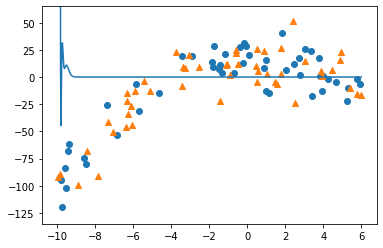

In [65]:
show_results(lin_mod_no_reg)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: RuntimeWarning: overflow encountered in square
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.892e+03, tolerance: 7.190e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Training error (rmse) = 12.464798639768457
Testing error (rmse) = 83.09808700054056


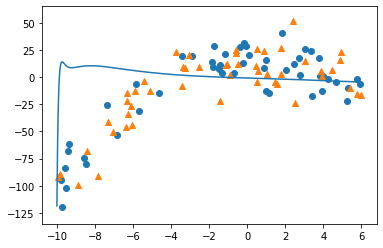

In [68]:
from sklearn.linear_model import Lasso
lin_mod_L1_reg = Lasso(alpha=0.1)
lin_mod_L1_reg.fit(x_train,y_train)
show_results(lin_mod_L1_reg)